# Linear Regression (선형회귀)

## Example of one feature (x1)

In [ ]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

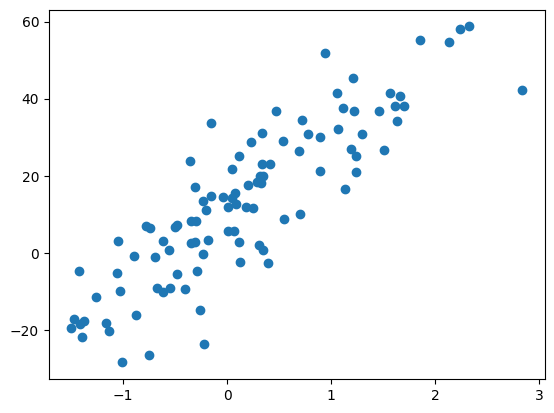

In [ ]:
n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [ ]:
# --------
w=np.random.randn()
b=np.random.randn()

lr = 0.01          # learning rate
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* 2 * ((y_pred - y)*x).mean()
    b = b - lr* 2 * (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)

print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 686.6100639406698 w= -0.4823889663199762 b= -1.6148825446521173
epoch= 10 loss= 476.20700932494896 w= 3.143913864989639 b= 1.0502933972864832
epoch= 20 loss= 342.1590662846187 w= 6.074303036646207 b= 3.128159428048846
epoch= 30 loss= 256.65305313208546 w= 8.444439771878196 b= 4.7452663206094154
epoch= 40 loss= 202.03609242856163 w= 10.36320393637356 b= 6.0012939356841075
epoch= 50 loss= 167.09591106449548 w= 11.918033576544776 b= 6.974700485879443
epoch= 60 loss= 144.70517157786074 w= 13.179191764908236 b= 7.7271922089776135
epoch= 70 loss= 130.32901647163703 w= 14.203177495596506 b= 8.307258579095675
epoch= 80 loss= 121.07905980150663 w= 15.03545339016423 b= 8.752967416400413
epoch= 90 loss= 115.1134253828674 w= 15.712627944789778 b= 9.094173977242779
epoch= 100 loss= 111.25601454316212 w= 16.264202147658786 b= 9.354266153520728
epoch= 110 loss= 108.75472647835379 w= 16.71396806614653 b= 9.551542564993332
epoch= 120 loss= 107.12779683434354 w= 17.0811292908251 b= 9.7003

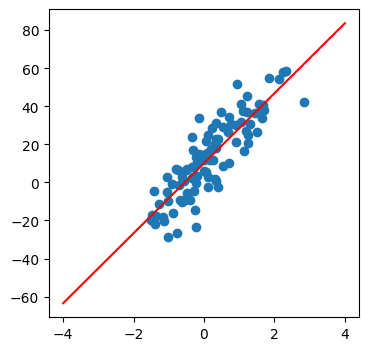

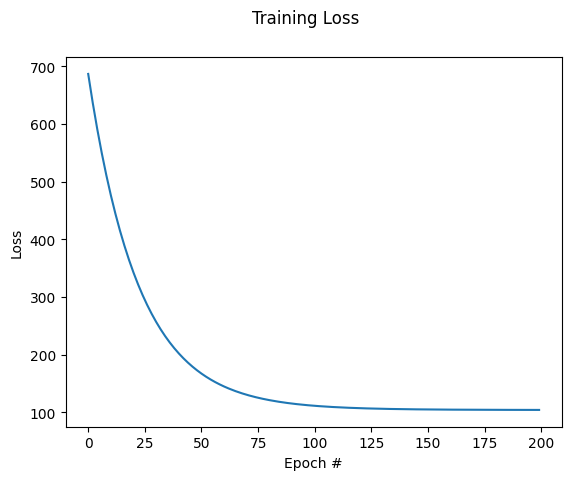

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-4,4,100)
yy = w * xx + b
plt.plot(xx,yy,c='r')
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Training two features (x1, x2)

In [ ]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.02                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)

print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 347.460805428852 w1= 27.71 w2= 39.73 b= 51.85


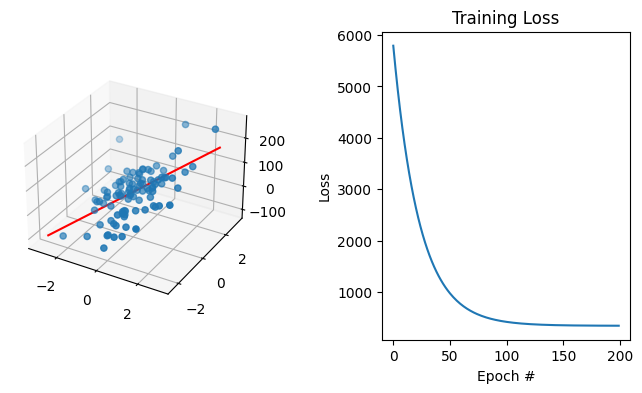

In [ ]:
plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100)
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r')

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Using regression function (LinearRegression)

In [ ]:
# ex3: using regression classes (LinearRegression and SGDRegressor)

from sklearn.linear_model import LinearRegression, SGDRegressor

n=100
x1, x2 = np.random.randn(n), np.random.randn(n)
y = x1*30 + x2*40 + 50 + np.random.randn(n)*20
X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

# Ordinary least squares (OLS) linear regression

model = LinearRegression()        # create model
model.fit(X,y)                    # train model

print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)


score:  0.8575663775013804
w1= 31.550044061575953 w2= 40.92249533746131 b= 50.121143442011174


In [ ]:
# prediction
new_X=[1,3]
print(model.predict([new_X]))
#----
z = np.random.rand(10,2)
model.predict(z)

[198.77145366]


array([ 75.6906394 ,  84.18640599,  79.28901523,  61.3437778 ,
        74.56777626, 118.58208358,  78.53198437, 100.42693997,
        90.48919471, 112.5422936 ])

w1 = 29.87651165077932, w2 = 39.17680750440581, b = 51.3645194962627


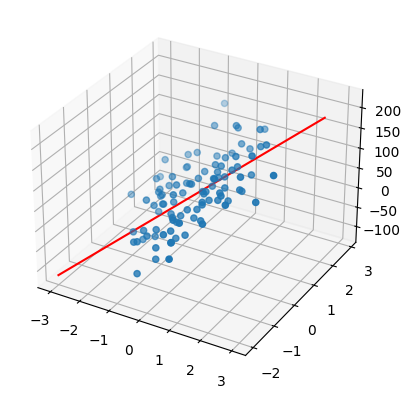

In [ ]:
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100)
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r')

In [ ]:
model = SGDRegressor()
model.fit(X,y)
print("score = ", model.score(X,y))
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_
print("w1 = {}, w2 = {}, b = {}".format(w1, w2, b))

score =  0.8575660435259322
w1 = 31.541309321207606, w2 = 40.88958073049226, b = [50.11293291]


In [ ]:
# normal equation (Ordinary Least Square)
X2 = np.concatenate([X, np.ones(len(X)).reshape(-1,1)], axis=1)
w_ols = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y)
w_ols

array([29.87651165, 39.1768075 , 51.3645195 ])

## Use make_regression function for training data

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
X, y = make_regression(n_samples=2000, n_features=2, noise=2.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.71577391 177.02800581  54.17648943 -79.29930148 -41.47720451]


In [ ]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9991477009521702

- but, what if the matrix X is singular, i.e. the columns are not independent?
  - you can not use the normal equation.

In [ ]:
X.shape, y.shape

((2000, 2), (2000,))

In [ ]:
X = np.c_[X, X[:,1]]   # duplicate the second column

In [ ]:
X[:5]

array([[ 0.33762316, -0.38981751, -0.38981751],
       [-1.02672037,  2.22938631,  2.22938631],
       [ 0.09896413,  0.63153974,  0.63153974],
       [ 3.97755099, -1.64591196, -1.64591196],
       [ 1.14153039, -0.70330793, -0.70330793]])

In [ ]:
np.linalg.matrix_rank(X)   # singular

2

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9991477009521702

In [ ]:
model.coef_, model.intercept_

(array([15.05265346, 42.71741588, 42.71741588]), 1.4168970243244168)

- if the LinearRegression model in scikit-learn encounters a singular matrix, it will automatically remove the duplicated columns from the matrix before computing the coefficients.
- the resulting coefficients for the duplicated features will be the same, since the model treats them as one and the same feature.
- In general, it is better to avoid introducing duplicated or highly correlated columns in the matrix, as this can lead to numerical instability, overfitting, and poor generalization performance of the model.

In [ ]:
model = SGDRegressor()
model.fit(X,y)
model.score(X,y)

0.9991474615076282

In [ ]:
model.coef_, model.intercept_

(array([15.04328084, 42.73781651, 42.73781651]), array([1.41361384]))

- If a singular matrix is given as input to the SGDRegressor model in scikit-learn, the model may encounter numerical instabilities or errors during the training process. This is because SGDRegressor uses a stochastic gradient descent algorithm to optimize the objective function, which requires computing gradients and updating weights iteratively based on small batches of data.
- When the matrix is singular, the gradients may not be well-defined or may change abruptly, leading to divergence or oscillation of the optimization algorithm. Moreover, the weights may not converge to a stable solution, and the resulting model may be highly sensitive to small perturbations or noise in the data.
- To avoid these issues, it is recommended to preprocess the data and remove any redundant or nearly collinear features before applying the SGDRegressor model. This can be done by performing feature selection, dimensionality reduction, or regularization techniques such as L1 or L2 regularization.
- Alternatively, scikit-learn provides other linear regression models that are better suited for handling singular or ill-conditioned matrices, such as Ridge regression or Lasso regression. These models incorporate regularization or constraint terms that help to stabilize the optimization process and improve the generalization performance of the model.

# Classification (선형분류)

## Linear classification (use Cross Entropy as loss function)

- Logistic Regression classifier
- also called log loss (logistic regression)

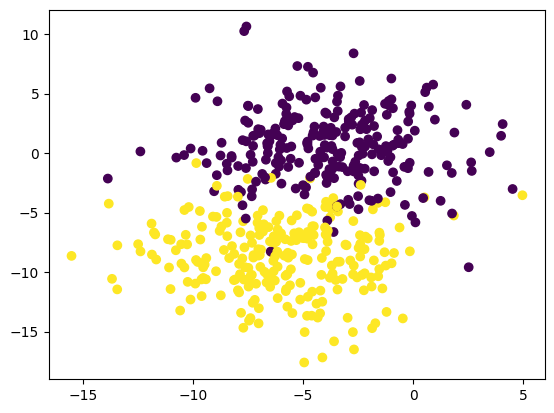

In [ ]:
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))

lossHistory = []
epochs = 300
alpha = 0.01

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction
    preds = np.clip(preds, 1e-9, 1.)                    # clip values for logarithm

    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)

    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1

    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)

0.18122107148195798 -0.6244956265259433 -0.8627986879556491


In [ ]:
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

0.89


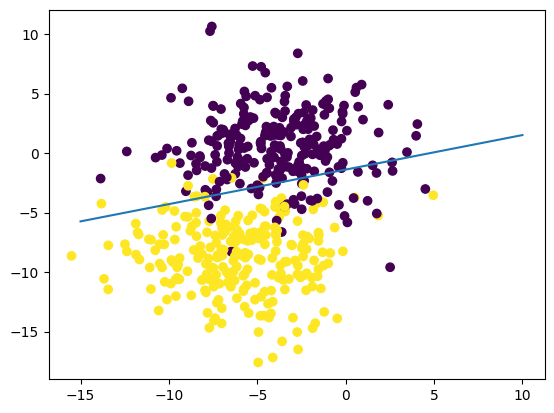

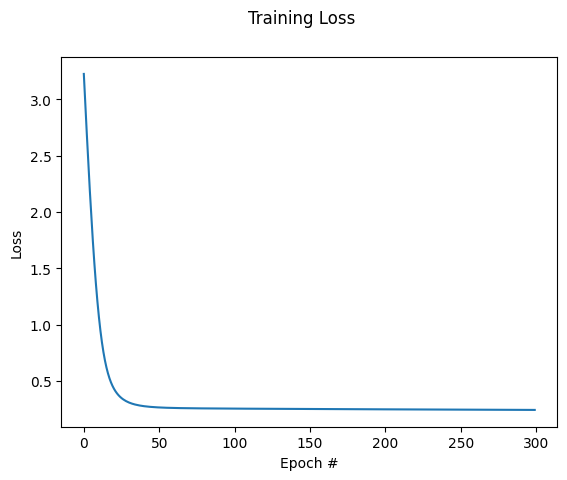

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-15,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Use library function: SGDClassifier()
- default: hinge loss (used in SVM)
  - the library handles the labels appropriately.
  - If you use labels such as 0 and 1, scikit-learn internally manages these without requiring explicit conversion to +1 and -1.

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 300
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)

In [ ]:
X.shape, y.shape

((300, 2), (300,))

SGDClassifier:  0.9466666666666667
[[-20.09113528 -50.04191034]] [-285.39304465]
Logistic Regression:  0.9466666666666667
[[-0.29246161 -0.97359622]] [-5.56358867]

Performance Scores:
0.9466666666666667 0.9466666666666667


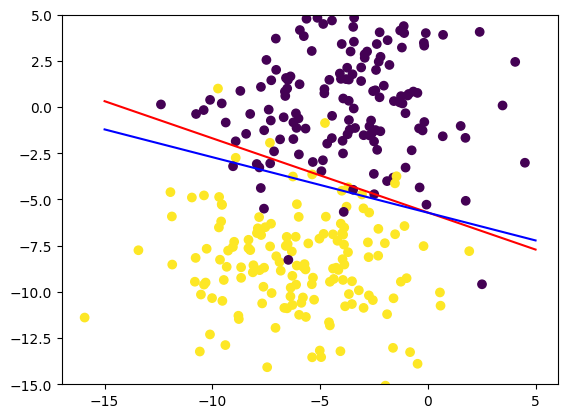

In [ ]:
clf = SGDClassifier()
clf.fit(X, y)
print("SGDClassifier: ", clf.score(X,y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()
log.fit(X, y)
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# ---------------
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')
# ---------------
print("\nPerformance Scores:")
print(clf.score(X,y), log.score(X,y))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = log.predict(X)
confusion_matrix(y, y_pred)

array([[144,   6],
       [ 10, 140]])

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.93      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# Labels (+1, -1) also works in the sklearn library
# 어떤 레이블을 사용하던지 sklearn 모델들은 수용하지만 모델에 따라서
# 내부 알고리즘 구현 상의 이유로 다른 결과를 낼 수 있음.
# 따라서, 표준 레이블 (0,1 또는 +1,-1)을 사용할 것을 권장함.

y = np.where(y == 0, -1, 1)  # change labels {0,1} -> {-1,+1}

clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
log = LogisticRegression()
log.fit(X, y)
print(log.score(X, y))

0.9466666666666667
0.9466666666666667


## Hinge Loss
- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
- Himge loss for input-output pair (x,y) is given as:
- L = max(0, 1 - yf(x))
- L = 0 (if y*f(x) >= 1), 1-y*f(x) (otherwise)
- dL/dw1 = 0 (if y*f(x) >= 1), -y*x1 (otherwise)
      

In [ ]:
N = 200
(X, y_org) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
y = y_org.copy()
y[y==0] = -1
X[:5], y[:5], y_org[:5]

(array([[ -3.81288666,   1.19685212],
        [ -9.05317959, -10.01560306],
        [ -3.06162538,   0.778844  ],
        [ -5.92654858,  -7.63047827],
        [ -5.60959691,  -9.03427239]]),
 array([-1,  1, -1,  1,  1]),
 array([0, 1, 0, 1, 1]))

0.32789715873696434 -0.6197460900611167 -0.6372458774715024
Accuracy is: 0.97.


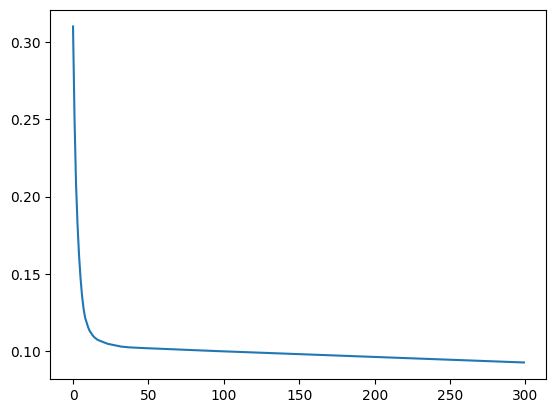

In [ ]:
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()
lossHistory = []
epochs = 300
alpha = 0.01

N = len(x1)
for epoch in np.arange(epochs):

    w1_deriv, w2_deriv, b_deriv, loss = 0., 0., 0., 0.
    for i in range(N):
        score = y[i]*(w1*x1[i] + w2*x2[i] + b)
        if score <= 1:
            w1_deriv = w1_deriv - x1[i]*y[i]
            w2_deriv = w2_deriv - x2[i]*y[i]
            b_deriv = b_deriv - y[i]
            loss = loss + (1 - score)   # psi = 1- score
        # else : derivatives are zero. loss is 0
    w1_deriv /= float(N)      # mean
    w2_deriv /= float(N)
    b_deriv  /= float(N)
    loss /= float(N)

    w1 = w1 - alpha * w1_deriv
    w2 = w2 - alpha * w2_deriv
    b  =  b - alpha *  b_deriv

    lossHistory.append(loss)

print(w1, w2, b)

accuracy = ((w1*x1 + w2*x2 + b > 0) == y_org).sum()/N
print("Accuracy is: {}.".format(accuracy))
plt.plot(lossHistory)

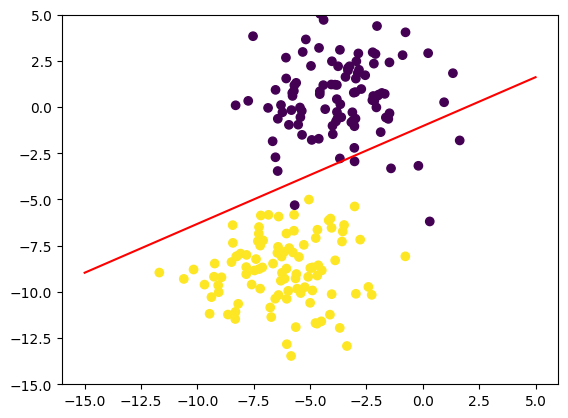

In [ ]:
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

# Normal Equation

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

Text(0, 0.5, 'Target')

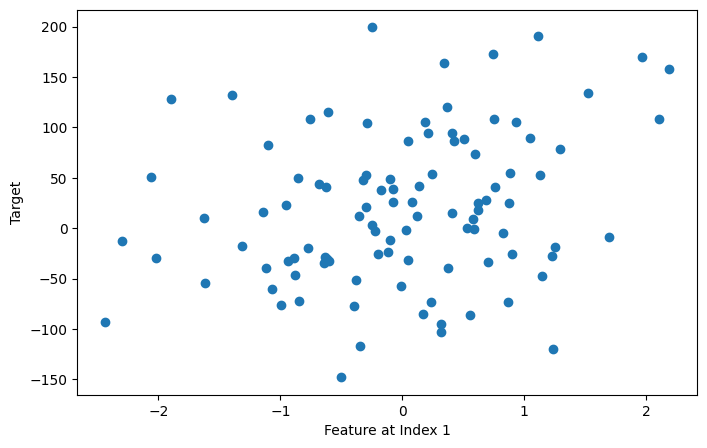

In [ ]:
X, y = make_regression(n_samples=100,
                       n_features=2,
                       noise=10,
                       random_state=1)

plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 0], y, marker='o')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")

In [ ]:
X.shape, y.shape

((100, 2), (100,))

In [ ]:
# linear regression
X_sc = StandardScaler().fit_transform(X)
# print(X_sc[:5], y[:5])
model = SGDRegressor()        # create model
model.fit(X_sc,y)                    # train model
print("coefficients and bias: ", model.coef_, model.intercept_)
model.score(X_sc,y)

model.predict(X_sc[:5])

coefficients and bias:  [29.49359429 71.85735469] [19.28008691]


array([ 69.26285745, -36.0997328 , -38.24019528, -10.97944388,
       -43.06567223])

- normal equation:
  - y = XW
  - W* = (X_{T}X)_{-1}X_{T}y

In [ ]:
# normal equation
X = X_sc    # scaled (but, actually you don't need scaling here.)
X_b = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("weight: ", w_best[:-1], "bias: ", w_best[-1])

# prediction for the first 5 (y = XW)
Xt = X[:5]
Xt_b = np.concatenate([Xt, np.ones((Xt.shape[0], 1))], axis=1)
Xt_b.dot(w_best)

weight:  [29.52899512 71.88859745] bias:  19.28081595550047


array([ 69.28675103, -36.17117272, -38.2733512 , -11.02296748,
       -43.112981  ])

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
model = LinearRegression()
model.fit(X_sc, y)
model.coef_, model.intercept_

(array([29.52899512, 71.88859745]), 19.280815955500472)

- we can see that the two methods give the same result.
- you have to remember that the matrix X should be non-singular (all columns are independent) in in order to use the normal equation.
- let's try a singular matrix...

In [ ]:
np.linalg.matrix_rank(X_b)   # non-singular

3

In [ ]:
X_b[:3]

array([[ 0.06345283,  0.66953924,  1.        ],
       [-2.13002995,  0.10357213,  1.        ],
       [-0.39312854, -0.6391205 ,  1.        ]])

In [ ]:
X_b2 = np.c_[X_b[:,:-1], X_b[:,1], X_b[:,-1]]
X_b2[:3]

array([[ 0.06345283,  0.66953924,  0.66953924,  1.        ],
       [-2.13002995,  0.10357213,  0.10357213,  1.        ],
       [-0.39312854, -0.6391205 , -0.6391205 ,  1.        ]])

In [ ]:
np.linalg.matrix_rank(X_b2)   # singular (4 columns, rank 3)

3

In [ ]:
try:
    w_best = np.linalg.inv(X_b2.T.dot(X_b2)).dot(X_b2.T).dot(y)
except:
    print("LinAlgError: Singular matrix")

LinAlgError: Singular matrix


# Locally weighted Regression
- example from https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf
- https://www.geeksforgeeks.org/locally-weighted-linear-regression-using-python/
- non-parametric: you always have to keep the data and parameters in the memory to make predictions.
(parametric: once the parameters are found, data can be put aside or erased. you just use the model with the parameters to make predictions like linear regression, y_pred = w*x + b.)

In [ ]:
import numpy as np
np.random.seed(8)

def train_gen(n_samples):
    X = np.random.randn(n_samples,1)
    y = 2*(X**3) + 10 + 4.6*np.random.randn(n_samples,1)
    return X, y

In [ ]:
# weight matrix
def wm(point, X, tau):

    # tau --> bandwidth
    # X --> Training data.
    # point --> the x where we want to make the prediction.

    m = X.shape[0]         # No of training examples
    w = np.mat(np.eye(m))  # Initialising W as an identity matrix.

    # Calculating weights for all training examples [x(i)'s].
    for i in range(m):
        xi = X[i]
        d = (-2 * tau * tau)
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d)

    return w    # shape: 1000 x 1000

In [ ]:
def predict(X, y, point, tau):

    m = X.shape[0]   # number of training examples.

    # Appending a cloumn of ones in X to add the bias term.
    # Just one parameter: theta, that's why adding a column of ones
    # to X and also adding a 1 for the point where we want to predict.
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1)

    # point is the x where we want to make the prediction.
    point_ = np.array([point, 1])

   # Calculating the weight matrix
    w = wm(point_, X_, tau)     # diagonal matrix (n_samples x n_samples)

    if (len(X) < 6) :
        print("W values",'\n', w.round(2),'\n', "X = :", X, '\n', "point= :", point)  # to see how it looks like
                                                          # only when n_samples < 6

   # Calculating parameter theta using the formula.
    theta = np.linalg.inv(X_.T@(w @ X_))@(X_.T@(w @ y))

   # Calculating predictions.
    pred = np.dot(point_, theta)

   # Returning the theta and predictions
    return theta, pred

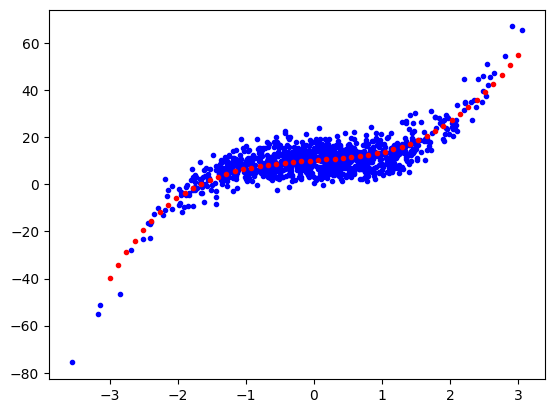

In [ ]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data.
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to predict.
   # tau --> the bandwidth.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval)

    preds = []

   # Predicting for all nval values and storing them in preds.
    for point in X_test:
        theta, pred = predict(X, y, point, tau)
        preds.append(pred)

   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)

   # Plotting
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

X, y = train_gen (1000)
plot_predictions(X, y, 0.7, 50)   # try to change tau: 2, 1, 0.5, ...0.05
                                  # too small -> overfitting

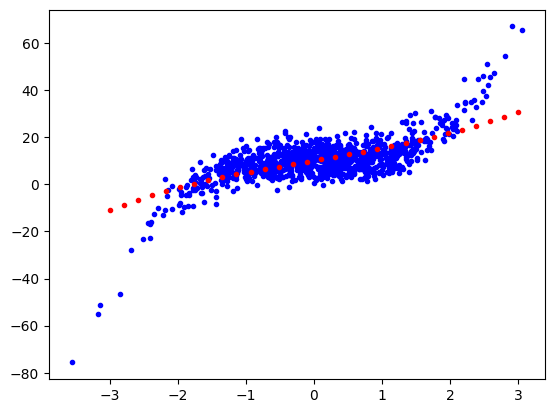

In [ ]:
plot_predictions(X, y, 2.0, 30)

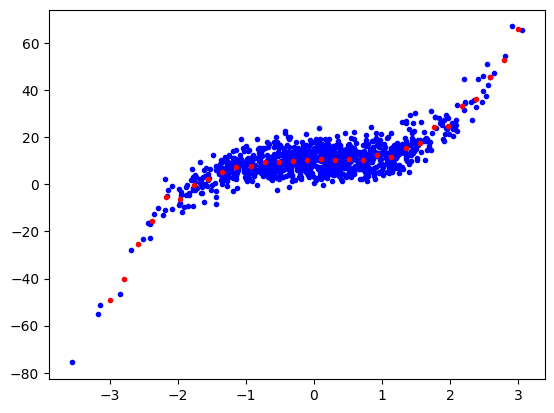

In [ ]:
plot_predictions(X, y, 0.05, 30)

W values 
 [[0.   0.   0.   0.   0.  ]
 [0.   0.26 0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]] 
 X = : [[ 0.27626589]
 [-1.85462808]
 [ 0.62390111]
 [ 1.14531129]
 [ 1.03719047]] 
 point= : -3.0
W values 
 [[0.04 0.   0.   0.   0.  ]
 [0.   0.88 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]] 
 X = : [[ 0.27626589]
 [-1.85462808]
 [ 0.62390111]
 [ 1.14531129]
 [ 1.03719047]] 
 point= : -1.5
W values 
 [[0.93 0.   0.   0.   0.  ]
 [0.   0.03 0.   0.   0.  ]
 [0.   0.   0.67 0.   0.  ]
 [0.   0.   0.   0.26 0.  ]
 [0.   0.   0.   0.   0.33]] 
 X = : [[ 0.27626589]
 [-1.85462808]
 [ 0.62390111]
 [ 1.14531129]
 [ 1.03719047]] 
 point= : 0.0
W values 
 [[0.22 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.   0.   0.46 0.   0.  ]
 [0.   0.   0.   0.88 0.  ]
 [0.   0.   0.   0.   0.8 ]] 
 X = : [[ 0.27626589]
 [-1.85462808]
 [ 0.62390111]
 [ 1.14531129]
 [ 1.03719047]] 
 point= 

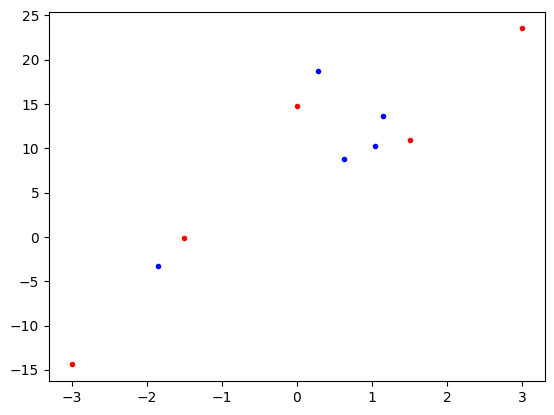

In [ ]:
np.random.seed(17)
X, y = train_gen (5)
plot_predictions(X, y, 0.7, 5)

# Exercise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier
from sklearn.datasets import make_regression, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
def show_plot(model, X, i):
    df = pd.DataFrame(X)
    coef = pd.Series(model.coef_, df.columns)
    plt.subplot(1,3,i)
    coef.plot(kind='bar', title='model coefficients')

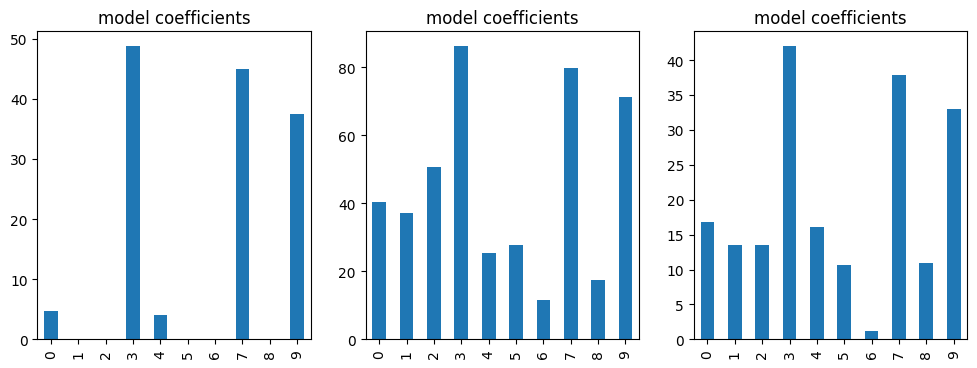

In [ ]:
X, y = make_regression(n_samples=100, n_features=10, noise=30, random_state=1)
X = StandardScaler().fit_transform(X)

clf1, clf2, clf3 = (Lasso(alpha = 30), LinearRegression(), Ridge(alpha = 100))
clfs = [clf1, clf2, clf3]
plt.figure(figsize=(12,4))
for i, clf in enumerate(clfs, 1):
    clf.fit(X, y)
    show_plot(clf, X, i)

0.97
[[-23.82839511 -46.73037947]] [-223.94651659]


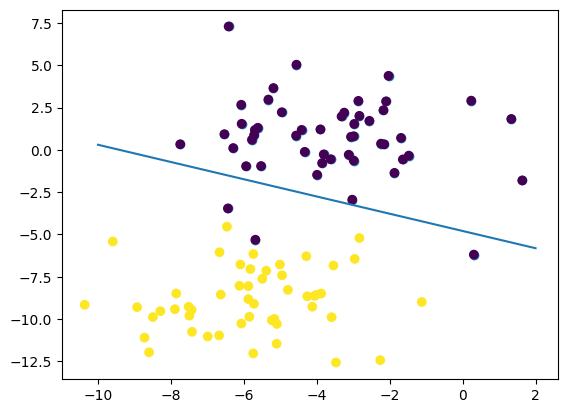

In [ ]:
(X, y) = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, random_state=17)
markers = ['o','+']
for i in range(2):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.scatter(X[:,0], X[:,1], c=y)
clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_, clf.intercept_)
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]
xx = np.linspace(-10,2,100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)